**PROJECT INDIVIDUAL ID**: PTID-CDS-JAN-25-2392A  


**PROJECT CODE**   : PRCP-1002-Handwritten Digits Recognition

**PROJECT NAME**   : Handwritten digits image processing data recognition

# Introduction :-
  1. Handwritten digit recognition is the process to provide the ability to machines to recognize human handwritten digits.
  2. It is not an easy task for the machine because handwritten digits are not perfect, vary from person-to-person, and can be made with many different      flavors.
  3. In this model, we are going to use the MNIST dataset for the implementation of a handwritten digit recognition.
  4. To implement this we will use a special type of deep neural network called Convolutional Neural Networks(CNN).
  5. In the end, we will also build a Graphical user interface(GUI) where you can directly draw the digit and recognize it straight away.
  6. Also, We have cover handwriting recognition in python that stimulates how these handwritten code is implemented.
  7. Deep learning is one such technique that contributes to developers enhancing machines.
  8. Various types of neural network architectures are used by deep learning algorithms to solve different types of problems. Here CNN is the one of         them.




# Business Case :-

  1) Handwritten digit recognition is a critical application of image processing and machine learning, with significant business potential across            various industries.This business case explores the opportunities, benefits, and implementation strategies for leveraging handwritten digit              image processing data to drive efficiency, accuracy, and innovation.
  2) A business case for handwritten digits image processing data lies in automating the extraction of numerical information from handwritten                documents, enabling efficient data entry and analysis in various sectors like banking (check processing), logistics (package labels), healthcare        (patient forms), and postal services (address recognition), by using machine learning models to accurately recognize handwritten digits from            scanned images, significantly reducing manual data entry time and cost while improving accuracy.
  3) The increasing reliance on digital automation and artificial intelligence (AI) has created a growing need for handwritten digit recognition.
  4) It's having some benefits like Increased Efficiency, Improved Accuracy, Faster Data Processing, Scalability etc.
  5) Here we can use technologies like Convolutional Neural Networks (CNNs), Image Preprocessing, Machine Learning Algorithms.
  6) By implementing a handwritten digit image processing system, businesses can achieve higher efficiency, accuracy, and cost savings while improving       customer service and scalability. This investment will enhance operational efficiency and provide long-term value.

# Domain Analysis :-

  1) A domain analysis of handwritten digits image processing data reveals that it is a complex, multi-faceted dataset characterized by variations in
     writing style, digit shape, size, and orientation, often influenced by factors like individual handwriting variations, pen pressure, and writing 
     instrument.
  2) It making accurate classification challenging but crucial for applications like automated check processing or document digitization.
  3) The primary focus is extracting meaningful features from these images to identify and classify digits (0-9) using techniques like convolutional 
     neural networks(CNNs) which excel at recognizing spatial patterns within images. 
  4) The key aspects of the domain analysis are image pre-processing, feature extraction, classification algorithms, dataset variations, and the impact
     of writing style, noise, and digit segmentation on recognition accuracy. 
  5) Understanding the intricacies of handwriting variations, the importance of image pre-processing, and the strengths of deep learning techniques like
     CNNs are crucial for developing successful handwritten digits recognition systems. 
  6) The domain analysis consider Data Preprocessing, Feature Engineering and Model Evaluation Metrics.

# Importing the basic libraries :-

- Importing all the necessary libraries. 
- Purpose: Importing necessary libraries is the first step to ensure you have all the tools required for data 
  manipulation, visualization and machine learning.
- pandas: For data manipulation and analysis.
- numpy: For numerical operations.
- seaborn and matplotlib: For data visualization.
- sklearn: For machine learning algorithms and evaluation metrics.
- warnings: For unexpected behaviour in their code.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data :-

- The MNIST database (Modified National Institute of Standards and Technology database) of handwritten digits consists of a training set of 60,000 
  examples and a test set of 10,000 examples.
- It is a subset of a larger set available from NIST. 
- Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which 
  introduced grayscale levels.

In [10]:
import keras
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Basic Checks :-

### 1) Shape

- In machine learning (ML), shape refers to the dimensions of an array, matrix, or tensor, describing the number of elements along each axis.
- It is commonly used to understand the structure of input data, model parameters, and outputs.
- In neural networks, weight matrices and activation tensors also have specific shapes that define how data flows through the model.
- Shape also helps in debugging ML models.
- Shape depends on the number of neurons in the layer.

In [15]:
x_train.shape  # 60k images
               # 28 * 28

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
y_test.shape

(10000,)

### 2) Datatype 

- In a machine learning (ML) model, a data type refers to the format of the data used for training, inference, and computations.
- Different data types determine how values are stored and processed in memory, impacting performance and accuracy.
- It optimizes storage and performance.
- Also prevents errors by restricting values.
- Different operations apply to different types (e.g., you can't add a string to an integer directly).

In [21]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [22]:
x_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'))

### 3) Checking does all digits are present

- We want to check whether all digits (0-9) are present in a dataset used for an ML model.

In [25]:
unique_values = np.unique(y_train)
print(f"unique values in y_train: {unique_values}")

unique values in y_train: [0 1 2 3 4 5 6 7 8 9]


### 4) Checking the Range of raw images pixel values

- It refers to the process of determining the minimum and maximum pixel intensity values in an image dataset. 
- This helps in understanding the data distribution and ensuring proper preprocessing for machine learning models.

In [28]:
print(f"min pixel value: {x_train.min()}")
print(f"max pixel value: {x_train.max()}")

min pixel value: 0
max pixel value: 255


##### As a raw image the range of images should be in between (0,255), Hence it is confirmed that the images pixel values are within the range.

### 5) Visualize the training images

- It is the process of displaying sample images from a dataset used for training a machine learning model.
- This helps in understanding the quality, distribution, and preprocessing of the data before feeding it into the model.
- It Ensures data is loaded correctly.
- It Helps detect noise, distortions, or missing labels.
- It also assists in understanding class distributions in classification problems.

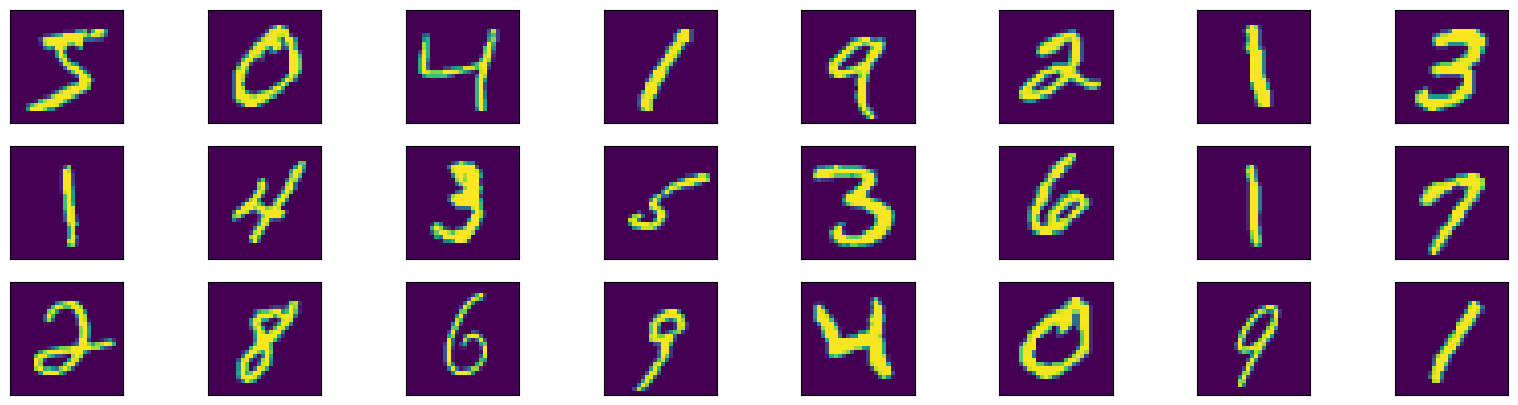

In [32]:
fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(3, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

#### Inorder to see how the x_train looks, we have to plot a graph :-

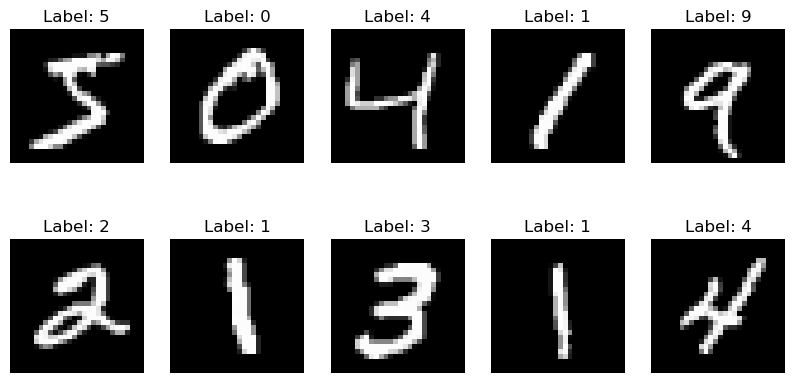

In [34]:
fig, axes = plt.subplots(2,5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i], cmap="gray" )
  ax.set_title(f"Label: {y_train[i]}")
  ax.axis("off")
plt.show()

x_train consists all the images. 

#### Inorder to see how the Y_train looks :-

In [37]:
print("first 10 rows of y_train:-")
print(y_train[:10])

first 10 rows of y_train:-
[5 0 4 1 9 2 1 3 1 4]


y_train consists the actual digits.

# Exploratory data Analysis(EDA) :-

- Exploratory Data Analysis (EDA) is the process of analyzing and visualizing datasets to understand their characteristics, detect patterns, and          identify potential issues before applying machine learning models.
- It helps in making data-driven decisions for feature engineering, model selection, and preprocessing.
- Detects anomalies and errors before model training.
- Identifies relationships between features for better model accuracy.
- Reduces dimensionality by selecting meaningful features.
- Helps in choosing the right ML algorithm based on data patterns.

### 1) Check the class distribution

- Checking the class distribution in a handwritten image recognition dataset refers to analyzing the number of samples available for each digit or character class (e.g., 0-9 for digits or A-Z for letters).
- This ensures that the dataset is balanced and helps prevent bias in the machine learning model.

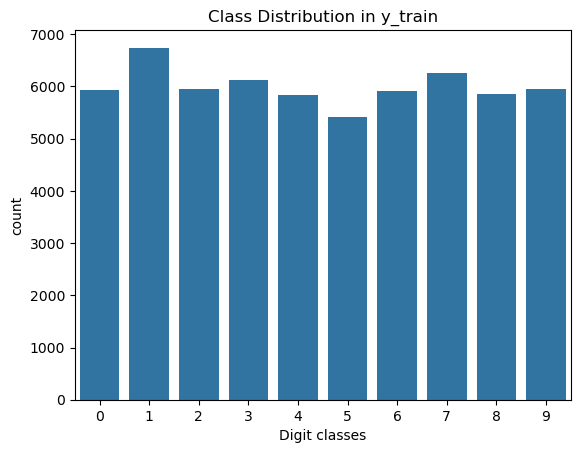

In [43]:
sns.countplot(x=y_train)
plt.title("Class Distribution in y_train")
plt.xlabel("Digit classes")
plt.ylabel("count")
plt.show()

### 2) To be little more precised

- It is used to check the class distribution of labels in a dataset. 
- Identifies the number of samples for each class in a dataset.
- It helps detect class imbalances in classification tasks, such as handwritten image recognition.

In [46]:
value_counts = pd.Series(y_train).value_counts()
print(value_counts)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


##### Since all classes have counts between 5,421 and 6,742, the dataset is not heavily imbalanced. Hence we confirmed that it is a balanced dataset.

# Data preprocessing :-

- Data preprocessing in handwritten image recognition refers to the techniques used to clean, transform, and standardize handwritten image data before feeding it into a machine learning model.
- This process ensures that the model receives properly formatted and optimized input for accurate digit or character recognition.
- It ensures that the data is consistent, free of errors, and optimized for better model performance.    

### 1) Checking for missing and corrupted images

- In the context of handwritten image recognition, ensuring the integrity of image datasets is crucial for accurate model training and evaluation.
- Missing or corrupted images can introduce noise, bias, and errors in the learning process.

In [52]:
print(f"Missing values in x_train: {np.isnan(x_train).sum()}")
print(f"Missing values in y_train: {np.isnan(y_train).sum()}")

Missing values in x_train: 0
Missing values in y_train: 0


##### There is no missing value

### 2) Checking Image pixel intensity Distribution

- Pixel intensity distribution analysis helps evaluate the quality and consistency of handwritten image datasets. 
- This process ensures that images have appropriate contrast, brightness, and variations necessary for effective recognition.
- Missing or corrupted images can introduce noise, bias, and errors in the learning process.
- Handwritten image recognition, ensuring the integrity of image datasets is crucial for accurate model training and evaluation.

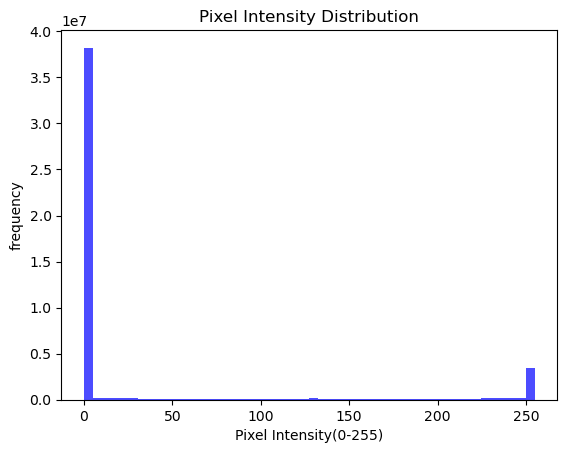

In [56]:
plt.hist(x_train.flatten(), bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Intensity(0-255)")
plt.ylabel("frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

##### This histogram is showing that most pixel values are closer to 0 (black) or 255 (white) with fewer gray values in between. Hence it indicates clearly that we can do Normalization easily.

### 3) Normalization(We do normalization only on input columns)

- Normalization is a preprocessing step in handwritten image recognition that standardizes pixel values across images to improve model training and convergence.
- It helps reduce variations in lighting, contrast, and stroke intensity, making the recognition system more robust.
- It adjusts pixel intensity levels to a common scale, reducing variations caused by lighting, contrast, or writing styles.

In [60]:
x_train = x_train/255.0
x_test = x_test/255.0

#### Let's check is it normalize or not

In [62]:
print(f"min pixel value: {x_train.min()}")
print(f"max pixel value: {x_train.max()}")

min pixel value: 0.0
max pixel value: 1.0


##### Yes our values are in between (0,1) , which means it is normalized.

### 4) Reshape(We do reshape only on input columns)

- Reshaping in handwritten image recognition refers to the process of changing the dimensions of an image or its corresponding data representation to match the input format required by a machine learning model.

In [66]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#### Let's check is it reshaped or not

In [68]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


##### As it clearly shows that we got the 4th dimension as 1, Hence it confirmed that it is successfully Reshaped.


### 5) Apply One-Hot Encoding

##### We will apply encoding only on output column, because the output column only consists digits as we convert digits to categorical.

- One-hot encoding is a technique used to convert categorical labels into a numerical format that can be understood by machine learning models.
- In handwritten image recognition, it is commonly used to represent class labels (digits, letters, or symbols) in a structured binary format.
- Most machine learning models cannot directly process categorical labels, transforms these labels into a numerical format that prevents models from interpreting them as ordinal values

In [73]:
from tensorflow.keras.utils import to_categorical

In [74]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Let's check is it converted or not

In [76]:
print("unique labels in y_train:", np.unique(y_train))

unique labels in y_train: [0. 1.]


##### As we clearly see it is converted to (0,1) . Hence converting digit to categorical is Successfull.



# Model Creation/ Define the Model Architecture :-

- Building a model for handwritten image recognition involves defining a deep learning architecture capable of extracting meaningful features from images and classifying them accurately.
- Convolutional Neural Networks (CNNs) are the most effective models for this handwritten image recognition.
- Model architecture in handwritten image recognition refers to the structured design of a deep learning model that processes handwritten images, extracts meaningful features, and classifies them into different categories 

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))             # first Convulational layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Flatten())                                                                  # flatten the image
model.add(Dense(128, activation="relu"))                                              # connecting to fully connected layers
model.add(Dropout(0.2))                                                               # to prevent Overfiiting, we have used Dropout
model.add(Dense(10, activation="softmax"))                                            # output layer, we have used softmax for multi-class classification
model.summary()                                                                       # to get the summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

##### Configuring the model for training by defining :- Optimizer, Loss function, Evaluation Metrics

##### a) Optimizer- It is an algorithm which is used to adjust the parameters (weights) of a model to minimize the error (or loss) during training.
##### b) Loss function- It is a mathematical function that measures how well a machine learning model’s predictions match the actual values.The goal of 
#####    training a model is to minimize this loss function.
##### c) Evaluation Metrics- used to measure how well a machine learning model is performing. They help compare models, fine-tune them , and ensure they
#####    generalize well to new data.


### 1)  Compiling the Model

- Compiling a model in handwritten image recognition refers to the process of configuring the learning process by specifying the optimizer, loss function, and evaluation metrics before training.
- This step prepares the neural network to learn patterns from handwritten images.

In [85]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### 2) Train the Model

- Training the model in handwritten image recognition refers to the process of feeding labeled handwritten image data into a neural network so it can learn patterns and improve its ability to classify new handwriting samples. 
- This is done through multiple iterations where the model adjusts its internal parameters (weights and biases) to minimize errors and improve accuracy.

In [88]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data= (x_train, y_train))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.8437 - loss: 0.5020 - val_accuracy: 0.9850 - val_loss: 0.0484
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9812 - loss: 0.0616 - val_accuracy: 0.9902 - val_loss: 0.0311
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.9933 - val_loss: 0.0218
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9909 - loss: 0.0285 - val_accuracy: 0.9948 - val_loss: 0.0177
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9959 - val_loss: 0.0131
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.9964 - val_loss: 0.0117
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9970 - val_loss: 0.0098
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9959 - loss: 0.0121 - 

# Model Evaluation :-

- Model evaluation in handwritten image recognition refers to the process of assessing the trained model's performance using a separate dataset.
- The goal is to measure how well the model generalizes to unseen handwritten images by calculating metrics such as accuracy, loss, precision, recall, and F1-score.


In [91]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9898 - loss: 0.0321
test accuracy: 0.9926999807357788


### 1) Model Predictions 

- Model prediction in handwritten image recognition refers to the process where a trained machine learning model takes an input image of handwritten text and outputs a predicted label corresponding to the recognized character.
- The prediction is based on the patterns and features the model has learned during training.

In [94]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


# Model Evaluation Of Prediction :-

- Model evaluation of prediction in handwritten image recognition refers to the process of assessing how well a trained model classifies handwritten characters or digits. 
- It involves comparing the model's predicted outputs with actual labels to measure accuracy, error rate, and other performance metrics.
- The goal is to measure how well the model generalizes to unseen handwritten images by calculating metrics such as accuracy, loss, precision, recall, and F1-score.

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [98]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("accuracy score:", accuracy)

accuracy score: 0.9927


In [99]:
precision_score = precision_score(y_test_classes, y_pred_classes, average="macro")
print("precision  score:", precision_score)

precision  score: 0.9926935373095181


In [100]:
recall_score = recall_score(y_test_classes, y_pred_classes, average="macro")
print("recall score:", recall_score)

recall score: 0.9925313256477161


In [101]:
f1_score = f1_score(y_test_classes, y_pred_classes, average="macro")
print("f1 score:", f1_score)

f1 score: 0.99260095804534


In [102]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [103]:
print(confusion_matrix(y_test_classes, y_pred_classes))

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1129    0    2    0    0    1    3    0    0]
 [   1    0 1027    0    0    0    1    3    0    0]
 [   0    0    2 1006    0    2    0    0    0    0]
 [   0    1    0    0  971    0    4    0    0    6]
 [   2    0    0   10    0  874    3    1    1    1]
 [   2    2    0    0    1    1  952    0    0    0]
 [   0    2    1    0    0    0    0 1022    0    3]
 [   1    0    0    2    0    0    0    1  969    1]
 [   0    0    0    2    1    4    0    2    0 1000]]


#### Now we can plot the graph to visualize properly

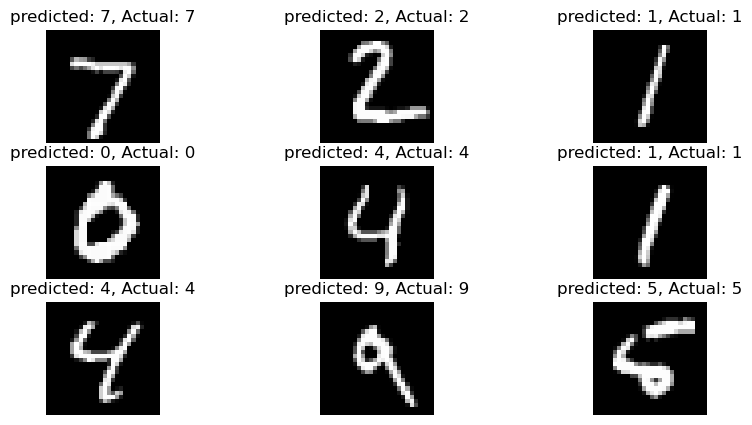

In [105]:
fig, axes = plt.subplots(3,3, figsize=(10,5))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[i].reshape(28, 28), cmap="gray" )
  ax.set_title(f"predicted: {y_pred_classes[i]}, Actual: {y_test_classes[i]}")
  ax.axis("off")
plt.show()

# Final insights of the model :-

- CNN is the best-performing model for handwritten digit recognition.
- Accuracy should be above 98% for a well-trained model on MNIST.
- Further improvements: Using transfer learning, deeper architectures (ResNet), or ensemble models.
- Overall Accuracy is High- 
The model performs very well, as most values lie on the diagonal. Few misclassifications indicate the model is learning we.
- Common Misclassification Patterns - The model confuses similar-looking digits (4 ↔ 9, 3 ↔ 8, 5 ↔ 6). This could be due to overlapping features or low   differentiation in some pixel regions. ons.

# Model Comparison :-

- Accuracy for this model by using CNN is 99%.
- So CNN is the best-performing model for handwritten digit recognition.
- It is the best performing model.

# Challenges Faced :-

- Overfitting: Addressed using dropout, data augmentation, or batch normalization.
- Computational Cost: Deep networks take longer to train.
- Handwriting Variability: Some digits may be misclassified due to similar handwriting styles.
- Noisy or overlapping text reduces accuracy.
- Multi-language support remains difficult, especially for cursive or complex scripts.


# Conclusion :-

- Convolutional neural network (CNN, or ConvNet) can be used to predict Handwritten Digits reasonably. We have successfully developed Handwritten digit 
recognition with Python, Tensorflow, and Machine Learning libraries. Handwritten Digits have been recognized by more than 99% validation accuracy.